In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm #used for estimation of parameters for simple linear regression model.
from sklearn.model_selection import train_test_split

data = pd.read_csv("MBA Salary.csv")
data.head()

X = sm.add_constant(data['Percentage in Grade 10'])
X.head()
Y = data['Salary']

train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size=0.8, random_state=100)

# Fitting the model
data_lm = sm.OLS(train_y, train_X).fit()

print(data_lm.params )

data_lm.summary2()

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-10-03 10:25      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

<Figure size 600x800 with 0 Axes>

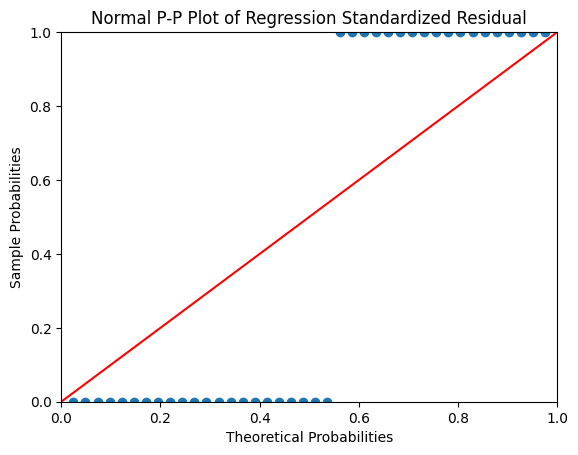

In [20]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

mba_salary_resid = data_lm.resid
probplot = sm.ProbPlot(mba_salary_resid)
plt.figure( figsize=(6, 8) )
probplot.ppplot( line='45')
plt.title("Normal P-P Plot of Regression Standardized Residual")
plt.show()

### **Test of Homoscedasticity**

Text(0, 0.5, 'Standardized residuals')

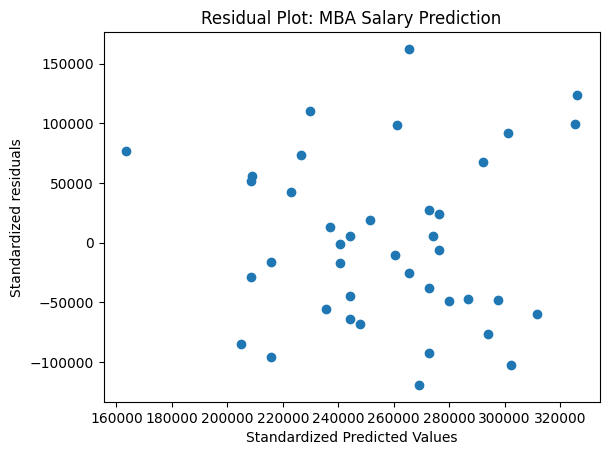

In [21]:
def get_standardized(vals):
  return (vals - vals.mean()/vals.std())

plt.scatter(get_standardized(data_lm.fittedvalues), get_standardized(mba_salary_resid))
plt.title("Residual Plot: MBA Salary Prediction")
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized residuals")

## **Outlier Analysis**

### **1. Z-score**

In [22]:
from scipy.stats import zscore
data['z_score_salary'] = zscore(data.Salary)
data[(data.z_score_salary > 3.0) | (data.z_score_salary < -0.3)]

,S. No.,Percentage in Grade 10,Salary,z_score_salary
1,2,76.33,200000,-0.766241
4,5,61.00,180000,-1.029590
7,8,68.00,235000,-0.305380
11,12,60.00,180000,-1.029590
18,19,70.00,231000,-0.358050
19,20,59.00,224000,-0.450222
20,21,63.00,120000,-1.819638
23,24,52.00,120000,-1.819638
24,25,49.00,120000,-1.819638
26,27,50.00,180000,-1.029590


### **2. Cook's Distance**

Text(0, 0.5, "Cook's Distance")

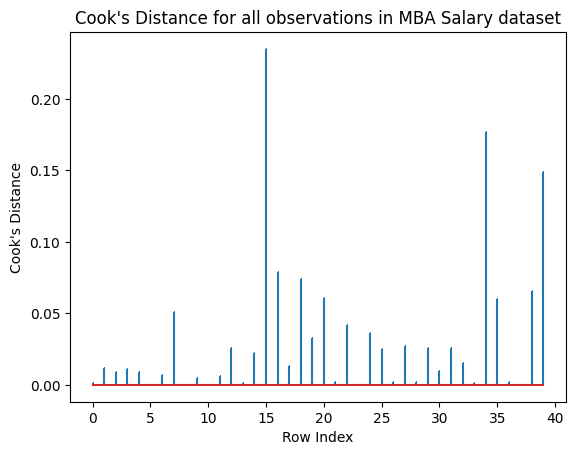

In [23]:
import numpy as np

mba_influence = data_lm.get_influence()
(c, p) = mba_influence.cooks_distance

plt.stem(np.arange( len(train_X)), np.round(c, 3), markerfmt=",")
plt.title("Cook's Distance for all observations in MBA Salary dataset")
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")

### **3. Levarage Values**

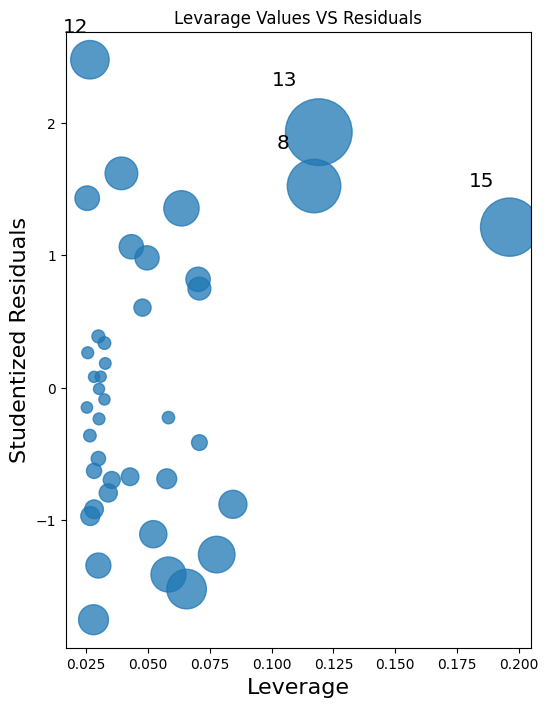

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(6,8))
influence_plot(data_lm, ax=ax)
plt.title("Levarage Values VS Residuals")
plt.show()

## **Making predictions and Measuring Accuracy**

In [25]:
pred_y = data_lm.predict(test_X)

## **Finding R-Squared and RMSE**

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


# the model only explains 15.6% of the variance in the validation set
np.abs(r2_score(test_y, pred_y))

np.sqrt(mean_squared_error(test_y, pred_y))




np.float64(73458.04348346895)

### **Calculating Prediction Intervals**

In [27]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# predict the y values
pred_y = data_lm.predict(test_X)

In [28]:
# Predict low and high interval values for y
_,  pred_y_low, pred_y_high = wls_prediction_std(data_lm, test_X, alpha=0.1)

pred_y_data = pd.DataFrame({"grate_10_pers": test_X["Percentage in Grade 10"], "pred_y": pred_y, "pred_y_left": pred_y_low, "pred_y_right": pred_y_high})
pred_y_data[0:10]

,grate_10_pers,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.831862,401276.973042
36,68.0,272707.227686,151576.714839,393837.740534
37,52.0,215737.829560,92950.942211,338524.716909
28,58.0,237101.353858,115806.869437,358395.838278
43,74.5,295851.045675,173266.083158,418436.008191
49,60.8,247070.998530,126117.560802,368024.436257
5,55.0,226419.591709,104507.444206,348331.739212
33,78.0,308313.101515,184450.060303,432176.142727
20,63.0,254904.290772,134057.999077,375750.582466
42,74.4,295494.986937,172941.528507,418048.445366
